In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin',header=None)

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

2024-02-22 08:24:01.973558: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 08:24:01.973693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 08:24:02.094511: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns=['sentiment', 'id', 'date', 'query', 'user_id', 'text']

In [6]:
df = df.drop(columns = ['id', 'date', 'query', 'user_id'])

In [7]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
def sentiment_make(sentiment):
    if sentiment == 0 : return 'Negative'
    elif sentiment == 2 : return 'Neutral'
    elif sentiment == 4 : return 'Positive'

In [9]:
df['sentiments'] = df['sentiment'].apply(sentiment_make)

In [10]:
df.head()

,sentiment,text,sentiments
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,0,is upset that he can't update his Facebook by ...,Negative
2,0,@Kenichan I dived many times for the ball. Man...,Negative
3,0,my whole body feels itchy and like its on fire,Negative
4,0,"@nationwideclass no, it's not behaving at all....",Negative


In [11]:
df = df.drop(columns = ['sentiment'])

In [12]:
df.describe()

,text,sentiments
count,1600000,1600000
unique,1581466,2
top,isPlayer Has Died! Sorry,Negative
freq,210,800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   text        1600000 non-null  object
 1   sentiments  1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


In [14]:
df.isna().sum()

text          0
sentiments    0
dtype: int64

Text(0.5, 1.0, 'Sentiment Count')

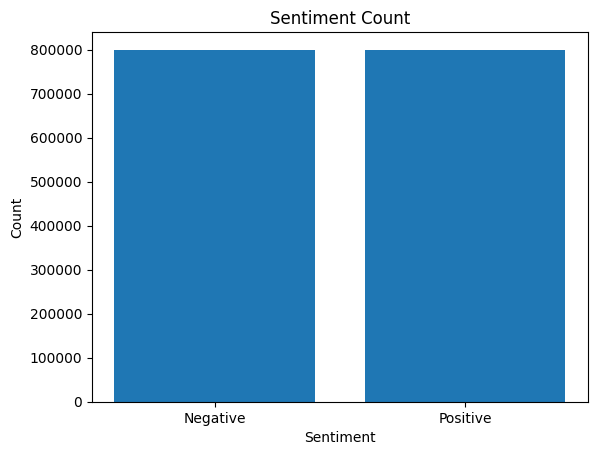

In [15]:
bar = df['sentiments'].value_counts()
plt.bar(bar.index, bar)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Count')

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [18]:
stopwords_eng = set(stopwords.words('english'))
ps = PorterStemmer()

In [19]:
def clean_txt(txt, stem = False):
    txt = re.sub(r'@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+', ' ', str(txt).lower()).strip()
    tokens = []
    for token in txt.split():
        if token not in stopwords_eng:
            if stem:
                tokens.append(ps.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [20]:
df['text'] = df['text'].apply(lambda x: clean_txt(x))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_data,test_data=train_test_split(df, random_state = 42)

In [23]:
train_data.head()

,text,sentiments
66270,dame 1,Negative
428045,thesaurus world sale ended,Negative
1307928,ight let lil white boy know hahaha,Positive
1112401,tweetlater pro way go really want work like,Positive
840793,loved,Positive


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [25]:
t = Tokenizer()
t.fit_on_texts(train_data.text)
train_seq = t.texts_to_sequences(train_data.text)
test_seq = t.texts_to_sequences(test_data.text)

In [26]:
max_len = 30
max_words = 100000

In [27]:
text_train = sequence.pad_sequences(train_seq, maxlen = max_len)
text_test = sequence.pad_sequences(test_seq, maxlen = max_len)
print(f"Traning text shape: {text_train.shape}")
print(f"Test text shape: {text_test.shape}")

Traning text shape: (1200000, 30)
Test text shape: (400000, 30)


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encodedsentiments_train = encoder.fit_transform(train_data['sentiments'])
encodedsentiments_test = encoder.fit_transform(test_data['sentiments'])
encodedsentiments_train = encodedsentiments_train.reshape(-1,1)
encodedsentiments_test = encodedsentiments_test.reshape(-1,1)
print(encodedsentiments_train.shape,encodedsentiments_test.shape)

(1200000, 1) (400000, 1)


In [29]:
i = tf.keras.layers.Input(shape=[max_len])
x = tf.keras.layers.Embedding(max_words, 50, input_length=max_len)(i)
x = tf.keras.layers.LSTM(64)(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=i, outputs=x)
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 50)            5000000   
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 5046337 (19.25 MB)
Trainable params: 5046337 (1

In [30]:
r = model.fit(text_train, encodedsentiments_train,
              batch_size=128, epochs=5, validation_data=(text_test, encodedsentiments_test),
              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, verbose = 1, min_lr=0.01)])

Epoch 1/5


I0000 00:00:1708590338.399021      68 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9375/9375 [==============================] - 88s 9ms/step - loss: 0.4649 - accuracy: 0.7778 - val_loss: 0.4457 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 2/5
9375/9375 [==============================] - 53s 6ms/step - loss: 0.4197 - accuracy: 0.8057 - val_loss: 0.4451 - val_accuracy: 0.7915 - lr: 0.0010
Epoch 3/5
9375/9375 [==============================] - 51s 5ms/step - loss: 0.3861 - accuracy: 0.8244 - val_loss: 0.4547 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 4/5
9375/9375 [==============================] - 51s 5ms/step - loss: 0.3492 - accuracy: 0.8436 - val_loss: 0.4847 - val_accuracy: 0.7834 - lr: 0.0010
Epoch 5/5
9375/9375 [==============================] - 51s 5ms/step - loss: 0.3110 - accuracy: 0.8618 - val_loss: 0.5354 - val_accuracy: 0.7751 - lr: 0.0010


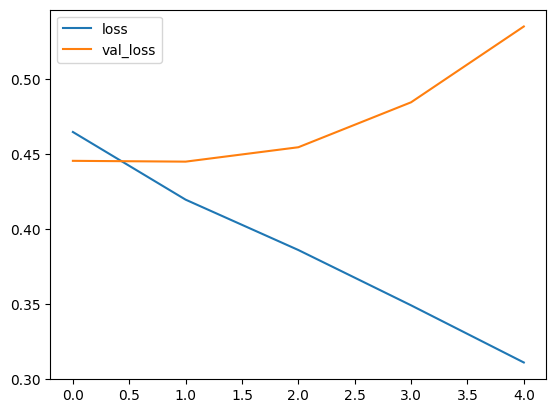

In [31]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

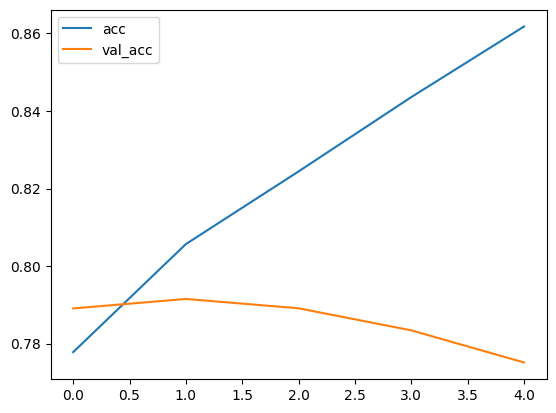

In [32]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [33]:
def decode_sentiment(score):
    if score > 0.5 : return "Positive"
    else : return "Negative"

scores = model.predict(text_test, verbose = 1, batch_size = 128)
y_pred = [decode_sentiment(score) for score in scores]

3125/3125 [==============================] - 7s 2ms/step


In [34]:
from sklearn.metrics import classification_report
print(classification_report(list(test_data.sentiments), y_pred))

              precision    recall  f1-score   support

    Negative       0.77      0.78      0.78    199581
    Positive       0.78      0.77      0.77    200419

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000

